Import necessary libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

Generate synthetic binary classification dataset using numpy. Create a dataset of 1000 samples with two features

In [ ]:
np.random.seed(42)

X = np.random.rand(1000, 2)  # Feature values between 0 and 1 (2 features)
y = (2 * X[:, 0] + 3 * X[:, 1] > 2).astype(int)  # Class label: 1 if the linear combination is > 2, else 0

Split the data into training and testing sets (80% training, 20% testing)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Build an Artificial Neural Network (ANN) using Keras Sequential API

In [ ]:
model = Sequential()

# Input layer with 2 neurons, one for each feature
# First hidden layer with 4 neurons and 'relu' activation
model.add(Dense(4, input_dim=2, activation='relu'))

# Second hidden layer with 4 neurons and 'relu' activation
model.add(Dense(4, activation='relu'))

# Output layer with 1 neuron and 'sigmoid' activation (for binary classification)
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compile the model with binary cross-entropy loss and Adam optimizer

In [ ]:
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.01), metrics=['accuracy'])

Train the model using the training data

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6003 - loss: 0.6775 - val_accuracy: 0.6450 - val_loss: 0.6526
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6796 - loss: 0.6334 - val_accuracy: 0.6450 - val_loss: 0.6509
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6563 - loss: 0.6437 - val_accuracy: 0.6450 - val_loss: 0.6519
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6732 - loss: 0.6322 - val_accuracy: 0.6450 - val_loss: 0.6522
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6509 - loss: 0.6481 - val_accuracy: 0.6450 - val_loss: 0.6533
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6736 - loss: 0.6319 - val_accuracy: 0.6450 - val_loss: 0.6531
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6887 - loss: 0.6207 - val_accuracy: 0.6450 - val_loss: 0.6520
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6459 - loss: 0.6517 - val_accuracy: 0.6450 - val_loss:

Predict the probabilities for the test data

In [ ]:
y_prob = model.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


Convert probabilities into binary class predictions

In [ ]:
y_pred = (y_prob > 0.5).astype(int)

Essential Metrics Calculation

Accuracy

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.645


Precision

In [ ]:
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

Precision: 0.645


Recall

In [ ]:
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

Recall: 1.0


F1 Score

In [ ]:
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

F1 Score: 0.78419452887538


ROC-AUC Score

In [ ]:
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", roc_auc)

ROC-AUC Score: 0.5


Confusion Matrix

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[  0  71]
 [  0 129]]


Visualizing Training Loss and Accuracy

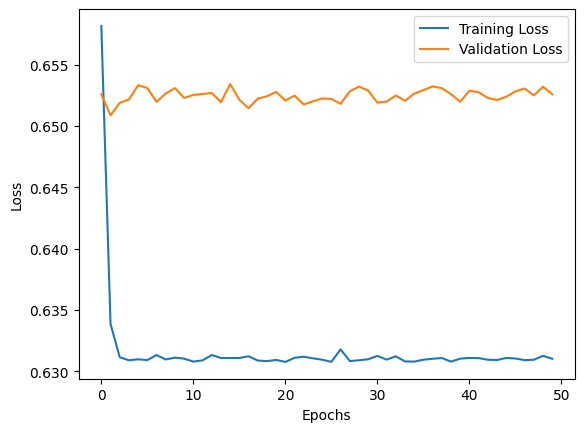

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

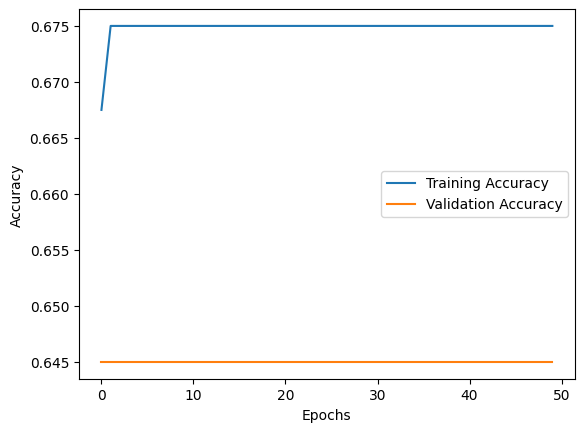

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Predict with a new test example

In [ ]:
new_test_example = np.array([[0.3, -0.1]])  # New sample with two features
new_pred_prob = model.predict(new_test_example)
new_pred = (new_pred_prob > 0.5).astype(int)
print(f"Prediction for new test example {new_test_example}: Class {new_pred[0][0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
Prediction for new test example [[ 0.3 -0.1]]: Class 1
